In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-22       2826      49       2352
new  confirmed
      15.0


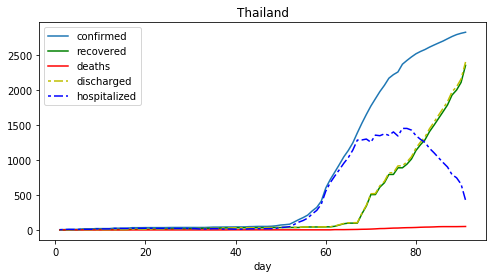

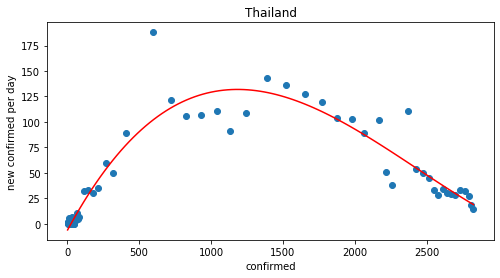

discharged:  2401
deaths:  49
%:  2.0408163265306123


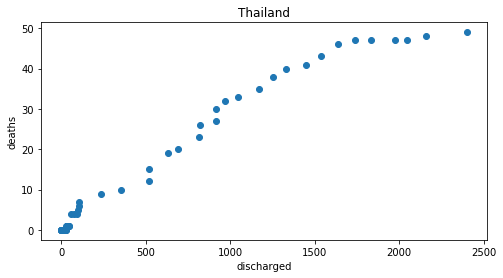

      date  confirmed  deaths  recovered
 2020-4-22       5532      93       3452
new  confirmed
      50.0


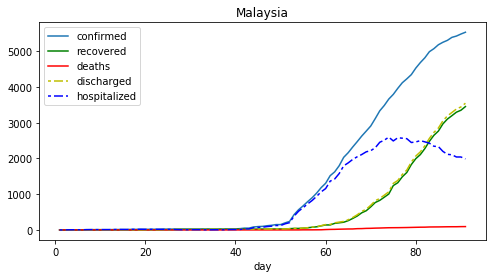

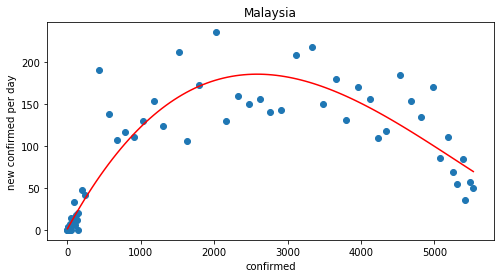

discharged:  3545
deaths:  93
%:  2.623413258110014


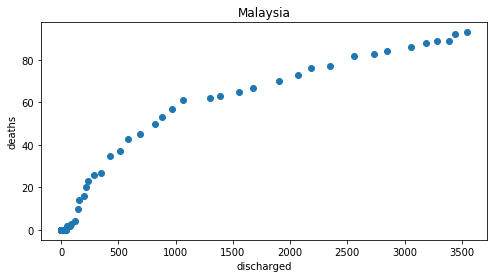

      date  confirmed  deaths  recovered
 2020-4-22      10141      12        896
new  confirmed
    1016.0


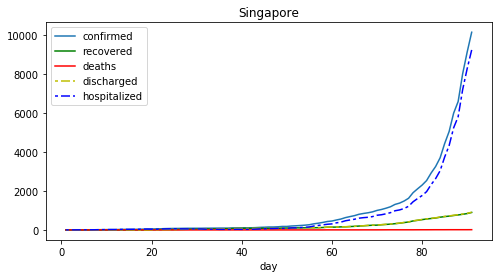

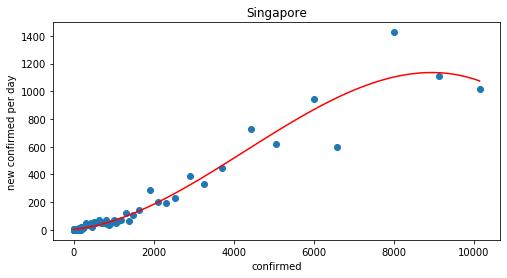

discharged:  908
deaths:  12
%:  1.3215859030837005


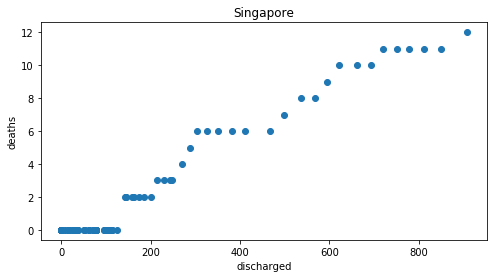

      date  confirmed  deaths  recovered
 2020-4-22       7418     635        913
new  confirmed
     283.0


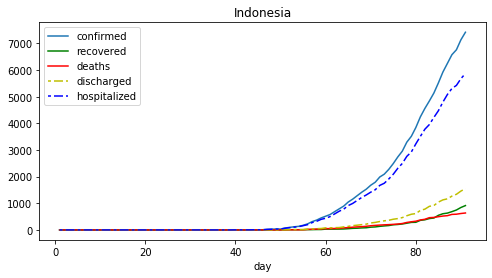

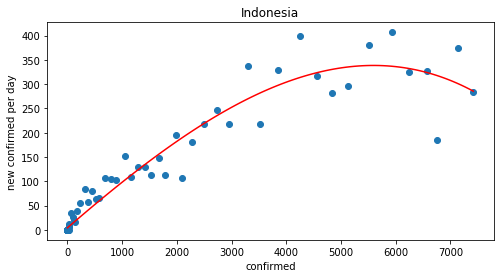

discharged:  1548
deaths:  635
%:  41.02067183462532


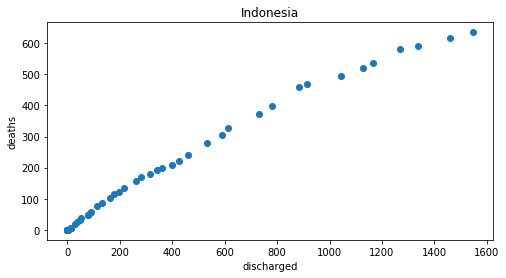

      date  confirmed  deaths  recovered
 2020-4-22     840351   46622      77366
new  confirmed
   28486.0


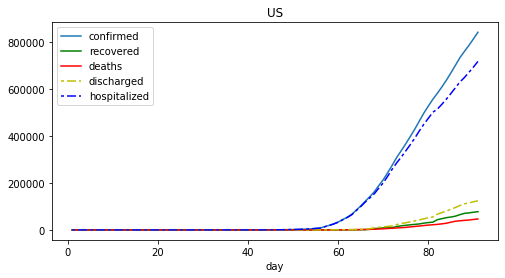

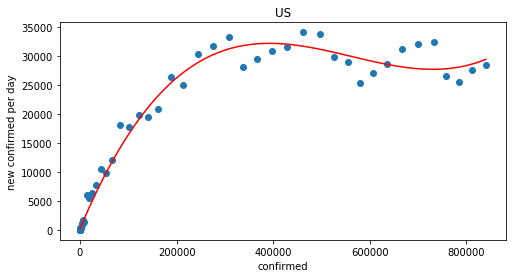

discharged:  123988
deaths:  46622
%:  37.60202600251637


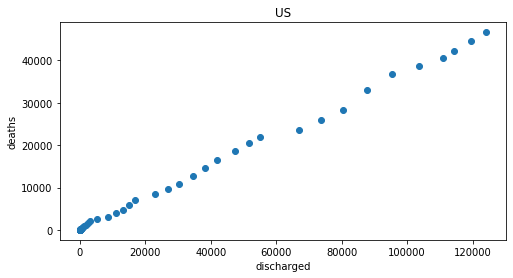

      date  confirmed  deaths  recovered
 2020-4-22      83868    4636      77861
new  confirmed
      15.0


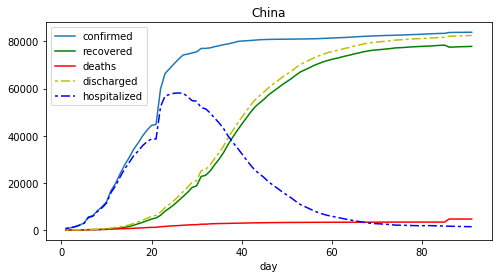

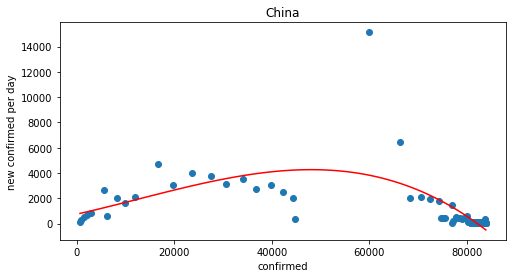

discharged:  82497
deaths:  4636
%:  5.619598288422609


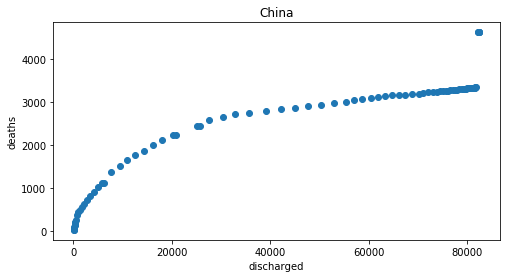

      date  confirmed  deaths  recovered
 2020-4-22      10694     238       8277
new  confirmed
      11.0


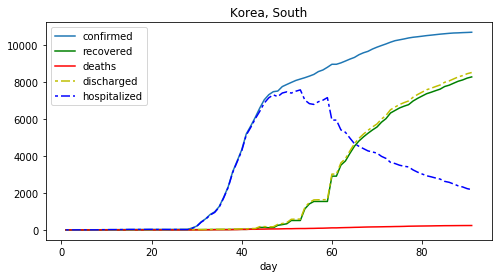

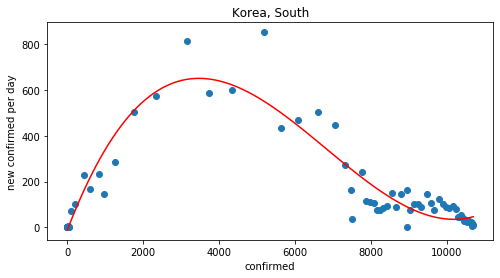

discharged:  8515
deaths:  238
%:  2.7950675278919555


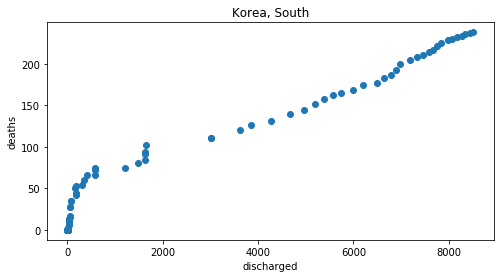

      date  confirmed  deaths  recovered
 2020-4-22     187327   25085      54543
new  confirmed
    3370.0


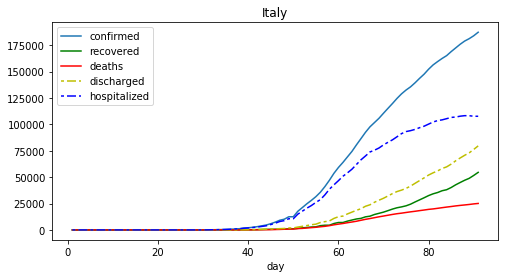

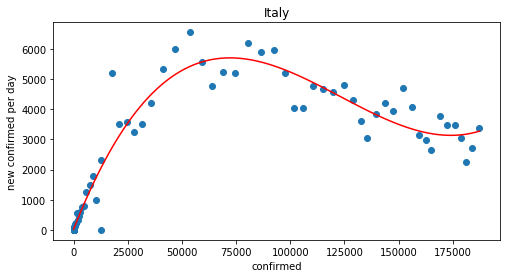

discharged:  79628
deaths:  25085
%:  31.50273773044658


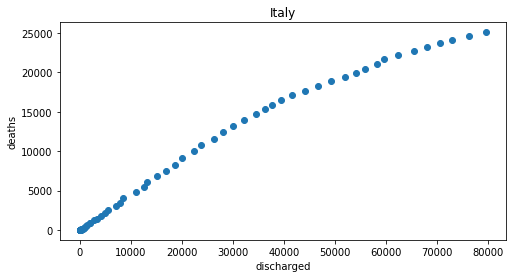

      date  confirmed  deaths  recovered
 2020-4-22     208389   21717      85915
new  confirmed
    4211.0


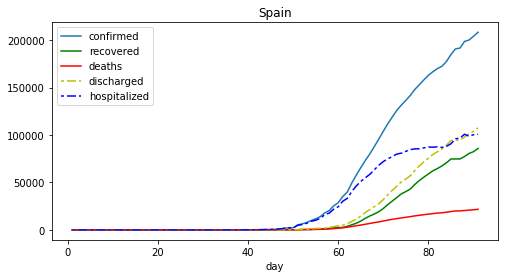

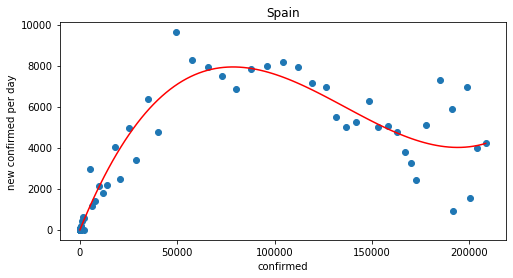

discharged:  107632
deaths:  21717
%:  20.177084881819532


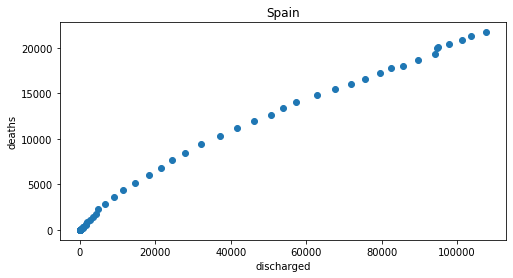

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
